In [1]:
import cv2
print(cv2.__version__)

4.4.0


In [2]:
#cv2.startWindowThread()
#cv2.namedWindow('test_image', cv2.WINDOW_NORMAL)
#cv2.namedWindow('Gray image', cv2.WINDOW_NORMAL)
image=cv2.imread('/Users/jon.heffer/python/ss4.png')
image2=cv2.imread('/Users/jon.heffer/python/flira.jpg')
#image=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
#image2=cv2.rotate(image2,cv2.ROTATE_90_CLOCKWISE)
#cv2.imshow('test_image',image)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Gray image', image2)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [3]:
print(image[[0],[0]])

[[28 16 16]]


In [4]:
temp=(142.-20.)*11./210.+32. 
print('temp is ',temp)

temp is  38.39047619047619


In [5]:
#for i in range(1,10):
    #cv2.destroyAllWindows()
    #cv2.waitKey(1)
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.interpolate import interp1d
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

%matplotlib notebook
fig, ax = plt.subplots()
im = ax.imshow(image, interpolation='bilinear', cmap=cm.RdYlGn)

left, bottom, width, height = (200, 200, 50, 80)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="white", alpha=0.5)


ax.add_patch(rect)
plt.show()

<IPython.core.display.Javascript object>

In [6]:
colourbar=image[range(430,1260),55]
colourbar=np.flipud(colourbar)
fig, ax = plt.subplots()
plt.plot(colourbar[:,0])
u, indices = np.unique(colourbar[:,0], return_index=True)
maxT=43.
minT=32.
span=maxT-minT

f = interp1d(tuple(np.float32(u)), tuple(np.float32(indices)/np.amax(indices)*span+minT),fill_value="extrapolate")
f(230)

<IPython.core.display.Javascript object>

array(42.62547302)

In [7]:
cap = cv2.VideoCapture('/Users/jon.heffer/python/tests.mp4')
total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('total = ',total)



total =  255


In [8]:
val=np.zeros(total,dtype=float)


left=230
top=410
bottom=450 
right=260

mask=np.zeros((640, 480), dtype=bool)
mask[np.arange(top,bottom)[None,:],np.arange(left,right)[:,None]]=1
mask[np.arange(top+1,bottom-1)[None,:],np.arange(left+1,right-1)[:,None]]=0

np.shape(mask)


(640, 480)

In [9]:
count=0

while(cap.isOpened()):
    ret, frame = cap.read(count)
    if  not ret: 
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    sub=gray[np.arange(top,bottom)[None,:],np.arange(left,right)[:,None]]
    
    val[count]=np.mean(sub)
    count += 1
#cap.set(2,0.1)
cap.release()
fig, ax = plt.subplots()
plt.plot(f(val))

<IPython.core.display.Javascript object>

In [10]:
nn=80
cap = cv2.VideoCapture('/Users/jon.heffer/python/tests.mp4')
fig2, (axs1, axs2) = plt.subplots(1, 2)
canvas = FigureCanvas(fig2)

cap.set(1,nn)

ret, frame2 = cap.read()


#gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)


#frame2[mask]=255
axs1.imshow(frame2,interpolation='bilinear', cmap=cm.RdYlGn,animated=True)
rect = plt.Rectangle((left, bottom), right-left, top-bottom,
                     facecolor="red", alpha=0.3)


axs1.add_patch(rect)
axs2.plot(f(tuple(val)))
line,=axs2.plot([nn,nn],[33,41])
plt.show
fig2.canvas.draw()
image_from_plot = np.frombuffer(fig2.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig2.canvas.get_width_height()[::-1] + (3,))
cap.release()
#
#cv2.waitKey(0)
#np.shape(gray)


#line.set_data([10,10],[33,41])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


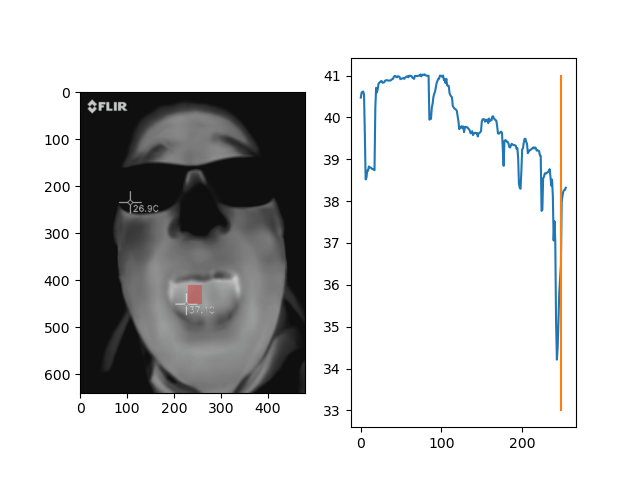

In [16]:
nn=10
cap = cv2.VideoCapture('/Users/jon.heffer/python/tests.mp4')
fig2, (axs1, axs2) = plt.subplots(1, 2)
canvas = FigureCanvas(fig2)

cap.set(1,nn)

video_name = 'video.avi'

height, width, layers = image_from_plot.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc('M','J','P','G'), 3., (width,height))


while nn < 250:
    

    ret, frame2 = cap.read()
    if  not ret: 
        break

    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)


    #frame2[mask]=255
    axs1.cla()
    axs2.cla()
    ims=axs1.imshow(frame2,interpolation='bilinear', cmap=cm.RdYlGn)
    rect = plt.Rectangle((left, bottom), right-left, top-bottom,
                         facecolor="red", alpha=0.3)

    #axs1.hold(True)
    axs1.add_patch(rect)
    #axs1.hold(False)
    line1=axs2.plot(f(tuple(val)))
    #axs2.hold(True)
    line2=axs2.plot([nn,nn],[33,41])
    #axs2.hold(False)
    fig2.canvas.draw()
    #fig2.show()
    image_from_plot = np.frombuffer(fig2.canvas.tostring_rgb(), dtype=np.uint8)
    image_from_plot = image_from_plot.reshape(fig2.canvas.get_width_height()[::-1] + (3,))
    video.write(image_from_plot)
    #axs2.lines.pop(0)
    #axs2.lines.pop(0)
    
    #axs2.line2.remove(line2)
    
    
    #axs1.imshow.remove(ims)
    nn+=2
cap.release()
video.release()

#
#cv2.waitKey(0)
#np.shape(gray)


#line.set_data([10,10],[33,41])
#cv2.imshow('test',image_from_plot)
#cv2.waitKey(0)

In [13]:
print('finished')



finished


In [ ]:





#cv2.imshow('test',image_from_plot)
#cv2.waitKey(0)

